### Telescope optics calculations for uv cubesat

- Telescope calculations
    http://www.loptics.com/ATM/mirror_making/cass_info/cass_info.html
    
    
- Cassegrain telescope wikipedia 
    https://en.wikipedia.org/wiki/Cassegrain_reflector
    
    
- RC telescope wikipedia
    https://en.wikipedia.org/wiki/Ritchey%E2%80%93Chr%C3%A9tien_telescope
    
    
- Cassegrain maginification formula
    https://www.youtube.com/watch?v=NhbeWOnwAdQ
    

- Cassegrain calculations
    http://www.alpo-astronomy.org/jbeish/Cass_Equ.pdf 
    
    http://bobmay.astronomy.net/CassNotes/index.htm


For the code in next cell folllow these parameters

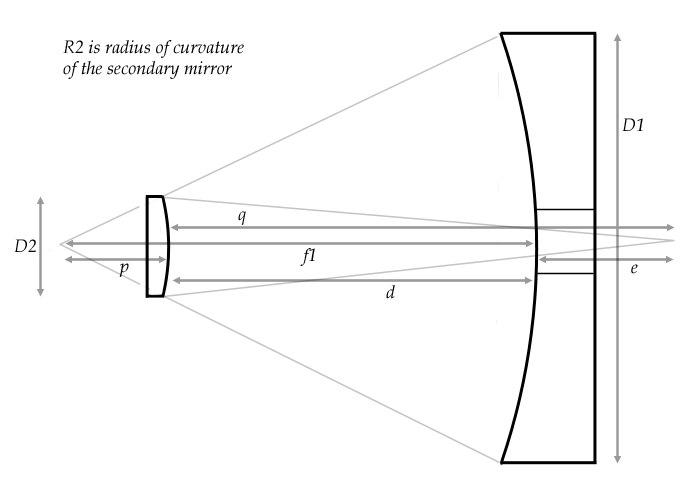

In [1]:
class optics:
    def __init__(self, 
                 focal_primary):
        
        self.focal_primary = focal_primary
    
    def system_focal_len(f1, M):
        '''
        System focal length calculation
        =================================
        F = f1 * M
        System focal length = focal length of primary mirror * Magnification
        '''
        return f1 * M

    def radius_curvature(f):
        '''
        Radius of Curvature
        =================================
        R = f* 2
        '''
        return f*2

    def magnification(f1, f2):
        '''
        Magnification of system
        =================================
        Ratio of primary focal length to secondary focal length
        '''
        return round((f1/f2),4)

    def back_focal_len(R2, M):
        '''
        Secondary to focal plane distance a.k.a back focal length
        ===========================================================
        Ratio of (f1 + e) to (M + 1)
        '''
        return round((((M-1)*R2) / (2*M)), 4)

    def param_e(M, f1, p):
        '''
        Distance from the primary mirror to the focus point of secondary mirror
        '''
        return round(((p*(M+1)) - f1), 4)

    def second_diameter(D1, p, f1):
        '''
        Secondary mirror
        ==================================
        Calculates the diameter of the secondary mirror
        '''
        return (D1 *p) / f1

    def param_q(R2,p):
        '''
        Distance between the secondary mirror and the focal plane
        =========================================================
        '''
        return (R2*p) / (R2-2*p)

    def param_s(q,f1,p):
        '''
        Ratio of paramter q and distance between mirrors
        ====================================
        '''
        return round((q/(f1-p)), 4)


    def RC_primary(s, M):
        '''
        Eccentricity of primary mirror of RC telescope
        ==============================================
        '''
        term_1 = (-2*s)/(M**3)
        return round((term_1 - 1) ,4)
    
    def RC_secondary(s, M):
        '''
        Eccentricity of secondary mirror of RC telescope
        ==============================================
        '''
        term_1 = (-4*M*(M-1) - 2*(M+s))/(M-1)**3
        return round((term_1 - 1), 4)
    


In [2]:

################# All Dimensions are in millimeters ##################
### Focal length ###
f1 = 100 
f2 = 70

# magnification
magnification = optics.magnification(f1,f2)

# Radius of curvature of primary and secondary mirrors
primary_radius = optics.radius_curvature(f1)
secondary_radius = optics.radius_curvature(f2)

# View calculations
print('ALL DIMENSIONS ARE IN MILLIMETERS')
print(' ')
print(f' magnification is {magnification}' + '\n' +
      f' Primary mirror radius of curvature is {primary_radius}' + '\n' +
      f' Secondary mirror radius of curvature is {secondary_radius}')

# System focal length
system_focal = optics.system_focal_len(f1, magnification)

# Back focal length
back_focal = optics.back_focal_len(secondary_radius, magnification)

# Distance from primary to focal plane
primary_to_plane = optics.param_e(magnification, f1, back_focal)

# View calculations
print(' ')
print(f' System focal length is {system_focal}' + '\n' +
      f' Back focal length is {back_focal}'+ '\n' +
      f' Distance from primary to focal plane is {primary_to_plane}')

# Diameter of secondary mirror
secondary_dia = optics.second_diameter(80, back_focal, f1)

# Distance from secondary to focal plane
secondary_to_plane = optics.param_q(secondary_radius, back_focal)

# Parameter s
ratio_s = optics.param_s(secondary_to_plane,
                        f1, back_focal)

# View calculations
print(' ')
print(f' Diameter of secondary mirror is {secondary_dia}' + '\n' +
      f' Distance from secondary to plane is {secondary_to_plane}' + '\n' +
      f' The ratio "s" is {ratio_s}')

# Eccentricity values for RC telescope
RC_primary = optics.RC_primary(ratio_s, magnification)
RC_secondary = optics.RC_secondary(ratio_s, magnification)

# View values
print(' ')
print(f' The eccentricity for primary mirror is {RC_primary}'+'\n'+
      f' The eccentricity for secondary mirror is {RC_secondary}')

ALL DIMENSIONS ARE IN MILLIMETERS
 
 magnification is 1.4286
 Primary mirror radius of curvature is 200
 Secondary mirror radius of curvature is 140
 
 System focal length is 142.86
 Back focal length is 21.001
 Distance from primary to focal plane is -48.997
 
 Diameter of secondary mirror is 16.800800000000002
 Distance from secondary to plane is 30.0020408579767
 The ratio "s" is 0.3798
 
 The eccentricity for primary mirror is -1.2605
 The eccentricity for secondary mirror is -78.0452


#### Asumptions made

- Focal length of primary = f1 = 100 mm
- Focal length of secondary = f2 = 70 mm
- Magnification = f1/f2
- Formula for distance between mirrors = f1 - p ?????? (from diagram)

#### Questions
- Radius of curvature formula
- Magnification formula
- Difference between parameter q and focal length of secondary mirror (IMPORTANT)
- Distance formula
- How to verify does it make sense?
